In [3]:
import classy as Class
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
sys.path.insert(0, '/Users/gabe/projects/recombination/src')
import RunData
from IPython.display import display, clear_output

import scipy.interpolate
import scipy.integrate

######################################################
#  Setting up plots
######################################################

%config InlineBackend.figure_format = 'retina'
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

def add_mode(ax, RunData, mode, plot_label="", plot_basis=False, plot_points=False, color="black"):
    
    Fisher = RunData.Fisher
    pivots = RunData.pivots
    width = RunData.width
    
    gaussian = lambda z, mu, sig, scal : scal*(1./np.sqrt(2*np.pi*sig*sig))*np.exp(-0.5*((z-mu)/sig)**2)
    #gaussian = lambda z, mu, sig, scal : scal*np.exp(-0.5*((z-mu)/sig)**2)

    inv = np.linalg.inv(Fisher)
    
    u, s, vh = np.linalg.svd(Fisher)
    
    eigenvals = s**2
    eigenvec = vh[mode].flatten()
    eigenval = eigenvals[mode]
    
    if(eigenval<0):
        eigenval*=-1
        print("corrected {0} eigenval {1}".format(color, eigenval))
    
    norm = np.abs(np.einsum("i,ij,j", eigenvec.T, inv, eigenvec)) ##normalizing the uncertainty to be unit
    #norm=eigenval
    eigenvec*=1./np.sqrt(norm)
    
    print("{0} eigenval {1}".format(color, 1./np.sqrt(eigenval)))
    
    points = []
    
    for i,z in enumerate(pivots):
        points.append(gaussian(z, z, width, eigenvec[i]))
    points=np.array(points)
    
    orient = np.trapz(points, pivots)
    if(orient>0):
        points*=-1
    
    norm = np.trapz(points**2, pivots)
    points*=(1./np.sqrt(norm))
    
    fun = scipy.interpolate.CubicSpline(pivots, points)

    zs = np.linspace(RunData.zmin, RunData.zmax, 10000)

    for i,zi in enumerate(pivots):
        if(plot_basis):
            ax.plot(zs, gaussian(zs, zi, width, eigenvec[i]), color=color, alpha=0.5)
        if(plot_points):
            ax.scatter(zi, gaussian(zi, zi, width, eigenvec[i]), color=color, marker="x", alpha=0.5)

    return ax.plot(zs, fun(zs), color=color,label=plot_label)

In [4]:
basedir = "/Users/gabe/projects/recombination/data"

key = "H0Mode"
all_data={}
for filename in os.listdir(basedir):
    if(key in filename):
        all_data[filename] =  RunData.RunData(os.path.join(basedir, filename))
        
for name, data in all_data.items():
    print("File {0} has Npert={1} and linear_sampling={2}".format(name, data.Npert, data.linear_sampling))
             

#run1 = RunData.RunData(os.path.join(basedir, "Feb21.ConvergenceTests.0"))
#run2 = RunData.RunData(os.path.join(basedir, "Feb21.ConvergenceTests.1"))
#run3 = RunData.RunData(os.path.join(basedir, "Feb21.ConvergenceTests.2"))
#run4 = RunData.RunData(os.path.join(basedir, "Feb21.ConvergenceTests.3"))



File Mar23.H0Mode.1 has Npert=80 and linear_sampling=20000
File Mar23.H0Mode.0 has Npert=100 and linear_sampling=20000
File Mar18.H0Mode.0 has Npert=80 and linear_sampling=20000
File Mar23.H0Mode.2 has Npert=80 and linear_sampling=20000
File Apr01.H0Mode.0 has Npert=80 and linear_sampling=20000
File Mar20.H0Mode.0 has Npert=80 and linear_sampling=20000
File Mar21.H0Mode.0 has Npert=80 and linear_sampling=20000


r eigenval 0.0019187860768534923


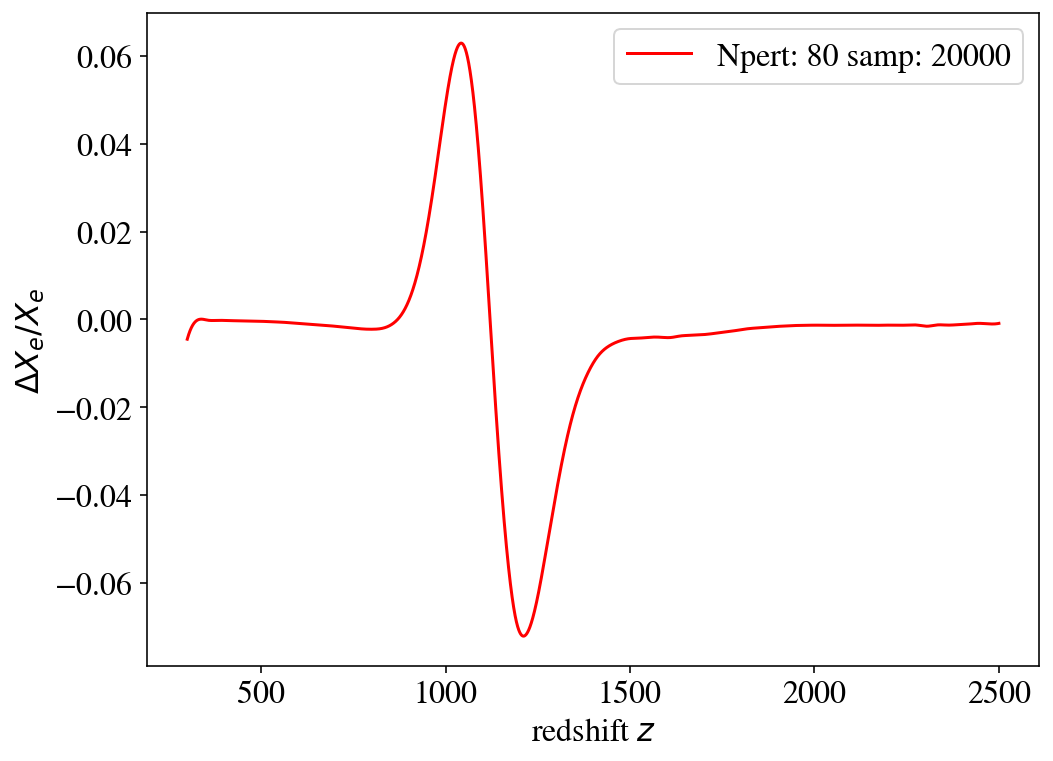

In [6]:
mode=0

fig,ax = plt.subplots()

points=False
basis=False

sublist = [all_data["Apr01.H0Mode.0"]]
colors = ["r", "k", "b", "g"]

add_mode(ax, sublist[0], mode, plot_label="Npert: {} samp: {}".format(sublist[0].Npert, sublist[0].linear_sampling), plot_basis=basis, plot_points=points, color=colors[0])
#add_mode(ax, sublist[1], mode, plot_label="Npert: {}".format(sublist[1].Npert), plot_basis=basis, plot_points=points, color=colors[1])

#ax.set_ylim([-.5, .5])
#ax.set_xlim([500, 900])

ax.set_xlabel("redshift $z$")
ax.set_ylabel("$\Delta X_e / X_e$")
plt.legend()
plt.show()

k eigenval 0.0019187860768534923
k eigenval 0.003994362628131005
k eigenval 0.02010435600276285
k eigenval 0.03685897040909599
k eigenval 0.040564485021614805
k eigenval 0.04371867827204812


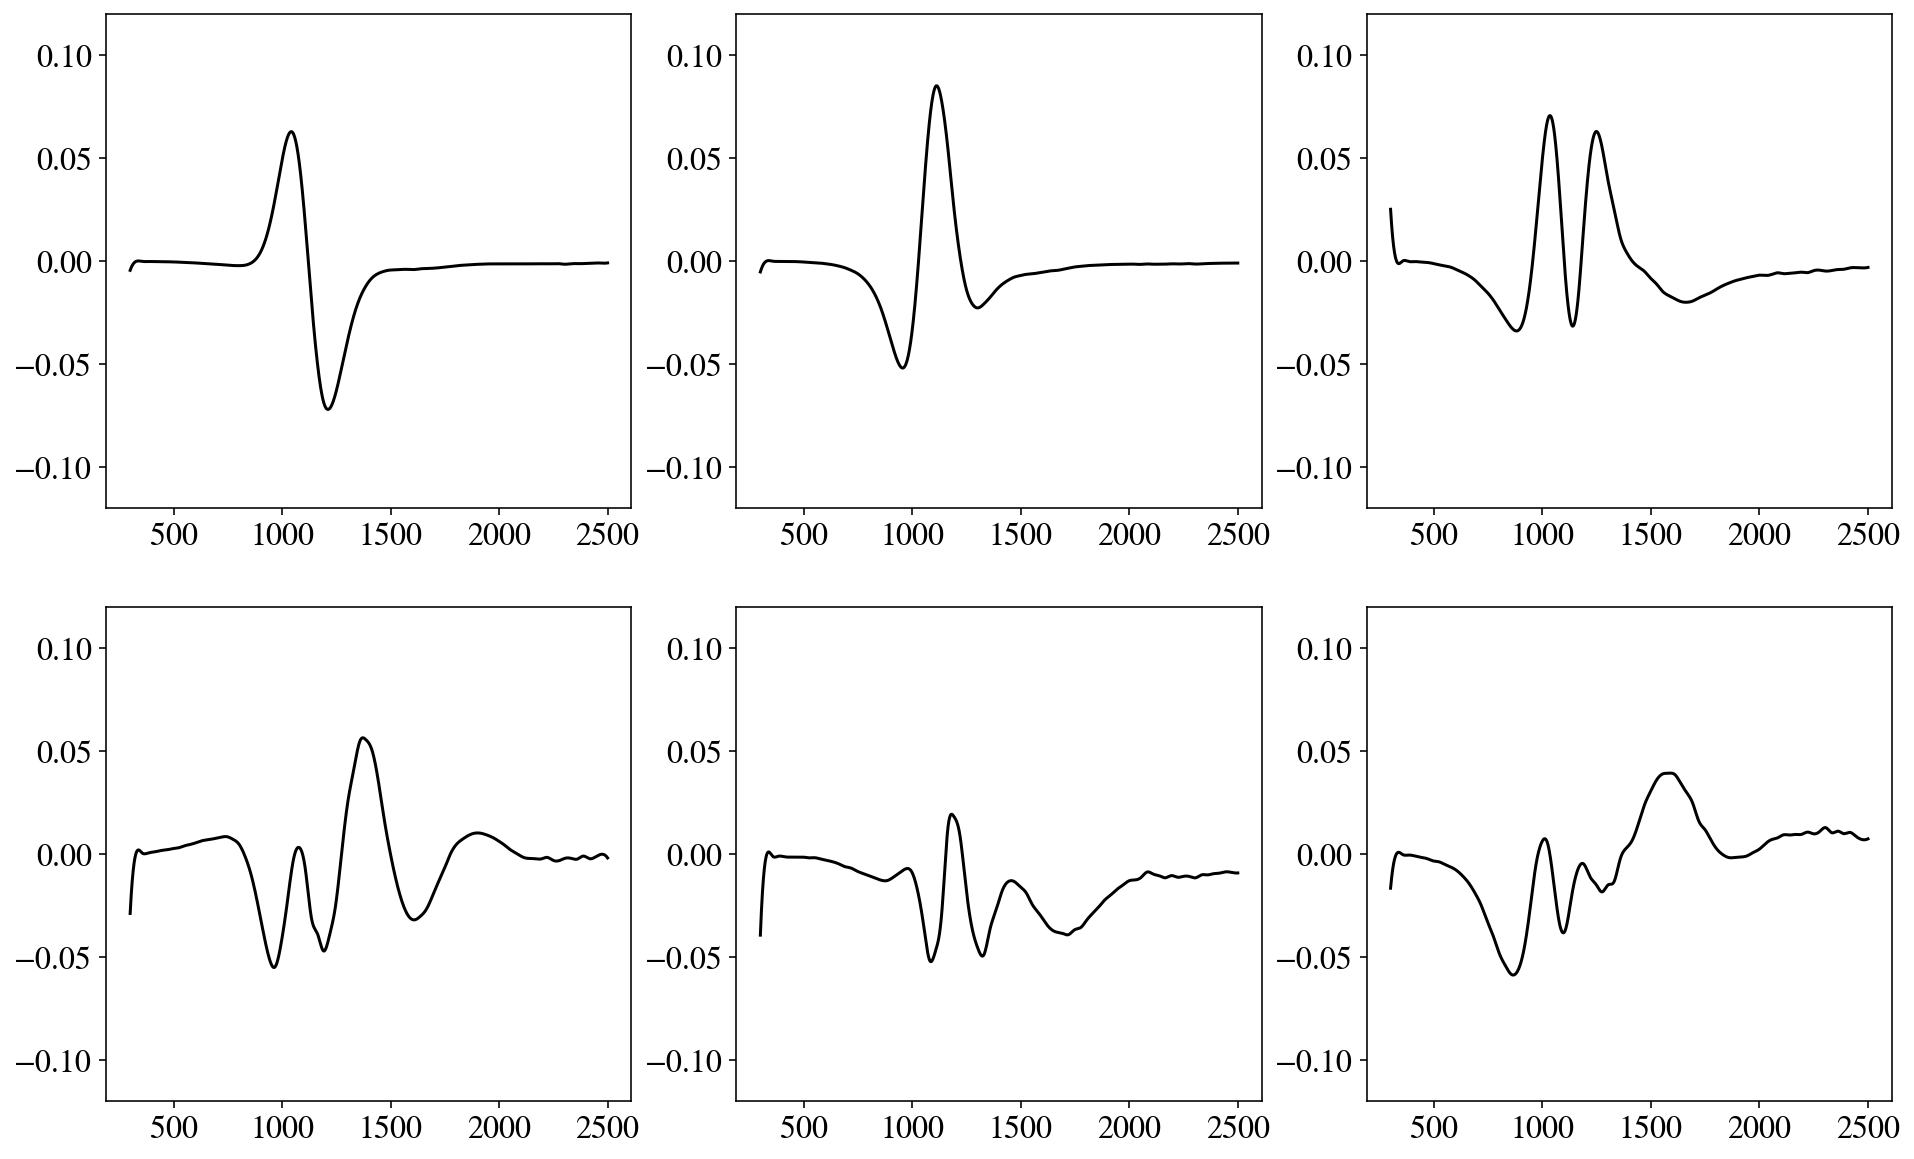

In [8]:
fig,axes =plt.subplots(2,3, figsize=(16,10))
cmap = plt.get_cmap("tab10")

for i,ax in enumerate(axes.flatten()):
    add_mode(ax, sublist[0], i, plot_label="Mode {}".format(i), plot_basis=basis, plot_points=points, color="k")
    #add_mode(ax, sublist[1], i, plot_label="Mode {}".format(i), plot_basis=basis, plot_points=points, color="r")
    ax.set_ylim([-0.12, 0.12])
plt.show()